In [2]:
%matplotlib inline

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def draw(folder, loss_range=[0, 10]):
    losses = pickle.load(open(os.path.join(folder, "saved_loss.p"), "rb"))
    x = np.squeeze(np.asarray(losses["X"]))
    train_loss = np.squeeze(np.asarray(losses["Y"]))
    val_loss = np.squeeze(np.asarray(losses["Y_test"]))
    
    plt.figure()
    plt.grid()
    axes = plt.gca()
    axes.set_ylim(loss_range)
    plt.title('Loss')
    plt.plot(x, train_loss, label='train')
    plt.plot(x, val_loss, label='val')
    plt.legend()
    
    accuracy = pickle.load(open(os.path.join(folder, "saved_accuracy.p"), "rb"))
    x2 = np.squeeze(np.asarray(accuracy["X"]))
    P = accuracy["P"]
    M = accuracy["M"]
    I = accuracy["I"]
    Ptest = accuracy["P_test"]
    Mtest = accuracy["M_test"]
    Itest = accuracy["I_test"]
    
    plt.figure()
    plt.grid()
    plt.title('Avg pixel accuracy')
    plt.plot(x2, P, label='train')
    plt.plot(x2, Ptest, label='val')
    plt.legend()
    
    plt.figure()
    plt.grid()
    plt.title('Mean class accuracy')
    plt.plot(x2, M, label='train')
    plt.plot(x2, Mtest, label='val')
    plt.legend()
    
    plt.figure()
    plt.grid()
    plt.title('mIoU')
    plt.plot(x2, I, label='train')
    plt.plot(x2, Itest, label='val')
    plt.legend()
    

In [4]:
def draw_multi(folder, loss_range=[1, 10]):
    losses = pickle.load(open(os.path.join(folder, "saved_loss.p"), "rb"))
    x = np.squeeze(np.asarray(losses["X"]))
    # task 1
    train_loss = np.squeeze(np.asarray(losses["Y1"]))
    val_loss = np.squeeze(np.asarray(losses["Y1_test"]))
    
    plt.figure()
    plt.grid()
    axes = plt.gca()
    axes.set_ylim(loss_range)
    plt.title('Task 1 - Loss')
    plt.plot(x, train_loss, label='train')
    plt.plot(x, val_loss, label='val')
    plt.legend()
    
    # task 2
    train_loss = np.squeeze(np.asarray(losses["Y2"]))
    val_loss = np.squeeze(np.asarray(losses["Y2_test"]))
    
    plt.figure()
    plt.grid()
    axes = plt.gca()
    axes.set_ylim(loss_range)
    plt.title('Task 2 - Loss')
    plt.plot(x, train_loss, label='train')
    plt.plot(x, val_loss, label='val')
    plt.legend()
    
    
    accuracy = pickle.load(open(os.path.join(folder, "saved_accuracy.p"), "rb"))
    print(accuracy)
    x2 = np.squeeze(np.asarray(accuracy["X"]))
    P1 = accuracy["P1"]
    M1 = accuracy["M1"]
    I1 = accuracy["I1"]
    P1test = accuracy["P1_test"]
    M1test = accuracy["M1_test"]
    I1test = accuracy["I1_test"]
    
    P2 = accuracy["P2"]
    M2 = accuracy["M2"]
    I2 = accuracy["I2"]
    P2test = accuracy["P2_test"]
    M2test = accuracy["M2_test"]
    I2test = accuracy["I2_test"]
    
    plt.figure()
    plt.grid()
    plt.title('Task 1 - Avg pixel accuracy')
    plt.plot(x2, P1, label='train')
    plt.plot(x2, P1test, label='val')
    plt.legend()
    
    plt.figure()
    plt.grid()
    plt.title('Task 2 - Avg pixel accuracy')
    plt.plot(x2, P2, label='train')
    plt.plot(x2, P2test, label='val')
    plt.legend()
    
    plt.figure()
    plt.grid()
    plt.title('Task 1 - Mean class accuracy')
    plt.plot(x2, M1, label='train')
    plt.plot(x2, M1test, label='val')
    plt.legend()
    
    plt.figure()
    plt.grid()
    plt.title('Task 2 - Mean class accuracy')
    plt.plot(x2, M2, label='train')
    plt.plot(x2, M2test, label='val')
    plt.legend()
    
    plt.figure()
    plt.grid()
    plt.title('Task 1 - mIoU')
    plt.plot(x2, I1, label='train')
    plt.plot(x2, I1test, label='val')
    plt.legend()  
    
    plt.figure()
    plt.grid()
    plt.title('Task 2 - mIoU')
    plt.plot(x2, I2, label='train')
    plt.plot(x2, I2test, label='val')
    plt.legend() 

In [5]:
def draw_im(folder, im_list):
    for im in im_list:
        image = pickle.load(open(os.path.join(folder, im), 'rb'))
        image = image.transpose([1,2,0])
        print(image.shape)
        plt.figure()
        plt.title(im)
        plt.imshow(image)

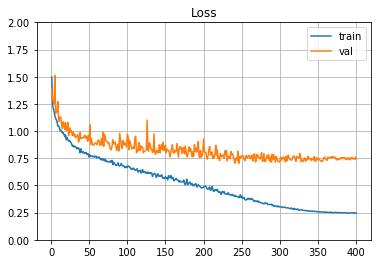

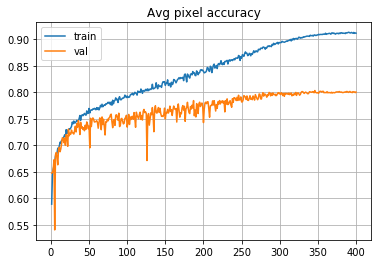

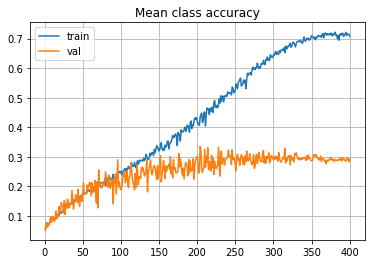

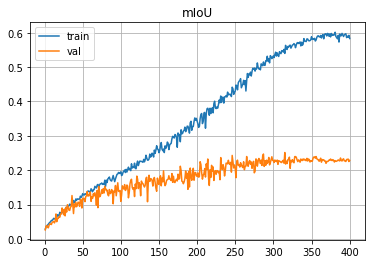

In [12]:
draw('results_fcn32resnet18_humansemseg', loss_range=[0,2])

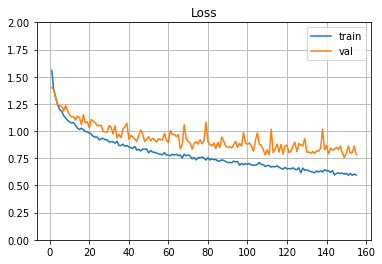

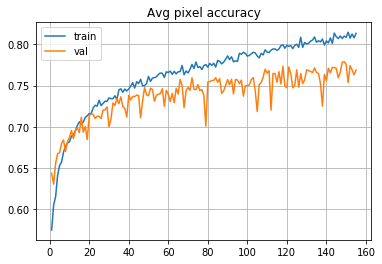

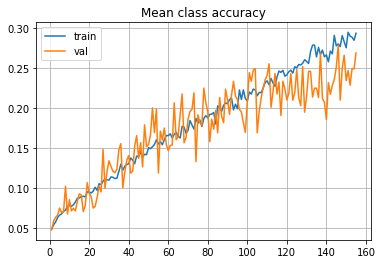

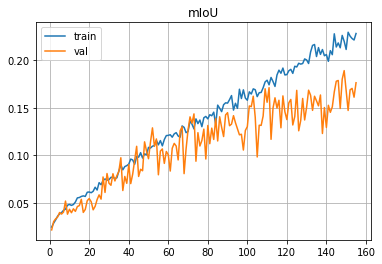

In [9]:
draw('results_fcn32resnet34_humansemseg', loss_range=[0,2])

In [61]:
# MULTI_PRETRAINED.o5271737 MULTI.o5271397
lines = open(os.path.join('/Users/wenliang/Documents/Codes/sunets-reproduce/MULTI.o5271397')).readlines()
mIoU_sbd = []
mIoU_lip = []
for line in lines:
    if 'Val' in line:
        temp = line.split()
        mIoU_sbd.append(float(temp[3][0:-1]))
        mIoU_lip.append(float(temp[6]))

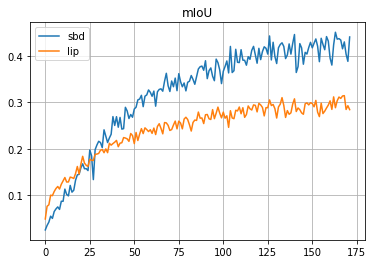

In [62]:
x = range(len(mIoU_sbd))
plt.figure()
plt.grid()
plt.title('mIoU')
plt.plot(x, mIoU_sbd, label='sbd')
plt.plot(x, mIoU_lip, label='lip')
plt.legend()

In [99]:
# SBD
mIoU_sbd_separately = []
mIoU_sbd_jointly = []
mIoU_sbd_separately_p = []
mIoU_sbd_jointly_p = []

mIoU_sbd_separately = np.squeeze(np.asarray(
    pickle.load(open(os.path.join('results_sunet64_sbd', "saved_accuracy.p"), "rb"))['I_test']))
mIoU_sbd_separately_p = np.squeeze(np.asarray(
    pickle.load(open(os.path.join('results_sunet64_sbd_pretrained', "saved_accuracy.p"), "rb"))['I_test']))

lines = open(os.path.join('/Users/wenliang/Documents/Codes/sunets-reproduce/MULTI.o5271397')).readlines()
for line in lines:
    if 'Val' in line:
        temp = line.split()
        mIoU_sbd_jointly.append(float(temp[3][0:-1]))
lines = open(os.path.join('/Users/wenliang/Documents/Codes/sunets-reproduce/MULTI_PRETRAINED.o5271737')).readlines()
for line in lines:
    if 'Val' in line:
        temp = line.split()
        mIoU_sbd_jointly_p.append(float(temp[3][0:-1]))

In [100]:
loss_sbd_separately = []
loss_sbd_jointly = []
loss_sbd_separately_p = []
loss_sbd_jointly_p = []

loss_sbd_separately = np.squeeze(np.asarray(
    pickle.load(open(os.path.join('results_sunet64_sbd', "saved_loss.p"), "rb"))['Y_test']))
loss_sbd_jointly = np.squeeze(np.asarray(
    pickle.load(open(os.path.join('results_sunet64_multi_sbd_lip', "saved_loss.p"), "rb"))['Y1_test']))
loss_sbd_separately_p = np.squeeze(np.asarray(
    pickle.load(open(os.path.join('results_sunet64_sbd_pretrained', "saved_loss.p"), "rb"))['Y_test']))
loss_sbd_jointly_p = np.squeeze(np.asarray(
    pickle.load(open(os.path.join('results_sunet64_multi_sbd_lip_pretrained', "saved_loss.p"), "rb"))['Y1_test']))

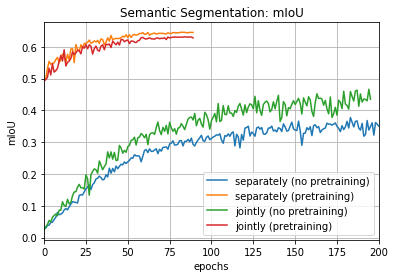

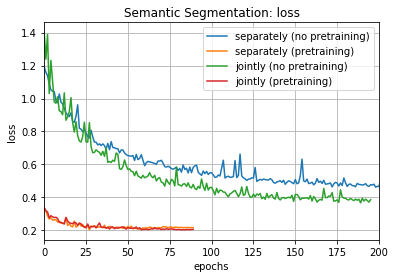

In [101]:
plt.figure()
plt.grid()
plt.title('Semantic Segmentation: mIoU')
plt.plot(range(len(mIoU_sbd_separately)), mIoU_sbd_separately, label='separately (no pretraining)')
plt.plot(range(len(mIoU_sbd_separately_p)), mIoU_sbd_separately_p, label='separately (pretraining)')
plt.plot(range(len(mIoU_sbd_jointly)), mIoU_sbd_jointly, label='jointly (no pretraining)')
plt.plot(range(len(mIoU_sbd_jointly_p)), mIoU_sbd_jointly_p, label='jointly (pretraining)')
plt.xlim(0,200)
plt.xlabel('epochs')
plt.ylabel('mIoU')
plt.legend()

plt.figure()
plt.grid()
plt.title('Semantic Segmentation: loss')
plt.plot(range(len(loss_sbd_separately)), loss_sbd_separately, label='separately (no pretraining)')
plt.plot(range(len(loss_sbd_separately_p)), loss_sbd_separately_p, label='separately (pretraining)')
plt.plot(range(len(loss_sbd_jointly)), loss_sbd_jointly, label='jointly (no pretraining)')
plt.plot(range(len(loss_sbd_jointly_p)), loss_sbd_jointly_p, label='jointly (pretraining)')
plt.xlim(0,200)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [102]:
# LIP
mIoU_lip_separately = []
mIoU_lip_jointly = []
mIoU_lip_separately_p = []
mIoU_lip_jointly_p = []

mIoU_lip_separately = np.squeeze(np.asarray(
    pickle.load(open(os.path.join('results_sunet64_lip', "saved_accuracy.p"), "rb"))['I_test']))
mIoU_lip_separately_p = np.squeeze(np.asarray(
    pickle.load(open(os.path.join('results_sunet64_lip_pretrained', "saved_accuracy.p"), "rb"))['I_test']))

lines = open(os.path.join('/Users/wenliang/Documents/Codes/sunets-reproduce/MULTI.o5271397')).readlines()
for line in lines:
    if 'Val' in line:
        temp = line.split()
        mIoU_lip_jointly.append(float(temp[6]))
lines = open(os.path.join('/Users/wenliang/Documents/Codes/sunets-reproduce/MULTI_PRETRAINED.o5271737')).readlines()
for line in lines:
    if 'Val' in line:
        temp = line.split()
        mIoU_lip_jointly_p.append(float(temp[6]))

In [103]:
loss_lip_separately = []
loss_lip_jointly = []
loss_lip_separately_p = []
loss_lip_jointly_p = []

loss_lip_separately = np.squeeze(np.asarray(
    pickle.load(open(os.path.join('results_sunet64_lip', "saved_loss.p"), "rb"))['Y_test']))
loss_lip_jointly = np.squeeze(np.asarray(
    pickle.load(open(os.path.join('results_sunet64_multi_sbd_lip', "saved_loss.p"), "rb"))['Y2_test']))
loss_lip_separately_p = np.squeeze(np.asarray(
    pickle.load(open(os.path.join('results_sunet64_lip_pretrained', "saved_loss.p"), "rb"))['Y_test']))
loss_lip_jointly_p = np.squeeze(np.asarray(
    pickle.load(open(os.path.join('results_sunet64_multi_sbd_lip_pretrained', "saved_loss.p"), "rb"))['Y2_test']))

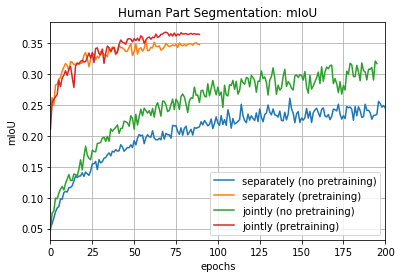

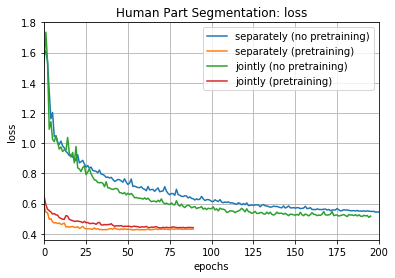

In [104]:
plt.figure()
plt.grid()
plt.title('Human Part Segmentation: mIoU')
plt.plot(range(len(mIoU_lip_separately)), mIoU_lip_separately, label='separately (no pretraining)')
plt.plot(range(len(mIoU_lip_separately_p)), mIoU_lip_separately_p, label='separately (pretraining)')
plt.plot(range(len(mIoU_lip_jointly)), mIoU_lip_jointly, label='jointly (no pretraining)')
plt.plot(range(len(mIoU_lip_jointly_p)), mIoU_lip_jointly_p, label='jointly (pretraining)')
plt.xlim(0,200)
plt.xlabel('epochs')
plt.ylabel('mIoU')
plt.legend()

plt.figure()
plt.grid()
plt.title('Human Part Segmentation: loss')
plt.plot(range(len(loss_lip_separately)), loss_lip_separately, label='separately (no pretraining)')
plt.plot(range(len(loss_lip_separately_p)), loss_lip_separately_p, label='separately (pretraining)')
plt.plot(range(len(loss_lip_jointly)), loss_lip_jointly, label='jointly (no pretraining)')
plt.plot(range(len(loss_lip_jointly_p)), loss_lip_jointly_p, label='jointly (pretraining)')
plt.xlim(0,200)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [115]:
np.floor(1.1)

1.0